## Task 1-3

In [3]:
from astropy.io import fits
import glob

import numpy as np
np.version.version
from matplotlib import pyplot as plt
%matplotlib inline

!dir C:\\nero.science.mq.edu.au\e7b209-teach\astr278\2017_data\spectra

 Volume in drive \\nero.science.mq.edu.au\e7b209-teach is NTFS
 Volume Serial Number is 5A1A-1647

 Directory of \\nero.science.mq.edu.au\e7b209-teach\astr278\2017_data\spectra

10/30/2017  05:49 PM    <DIR>          .
10/30/2017  05:49 PM    <DIR>          ..
10/30/2017  05:54 PM    <DIR>          2017_10_17_16inch
10/30/2017  05:41 PM    <DIR>          2017_10_18_16inch
10/30/2017  05:48 PM    <DIR>          2017_10_23_16inch
               0 File(s)              0 bytes
               5 Dir(s)       1,011,712 bytes free


In [12]:
h = fits.open('Rigel_Light_2017_10_24_0.100secs__16inch_00002376.FITS')
h
RigelSpectra = h[0].data

In [29]:
import matplotlib as mpl
mpl.colors
mpl.colors.PowerNorm?

(240, 65280, 1067.8421908586065)


Text(0.5,1,u'Rigel Spectra')

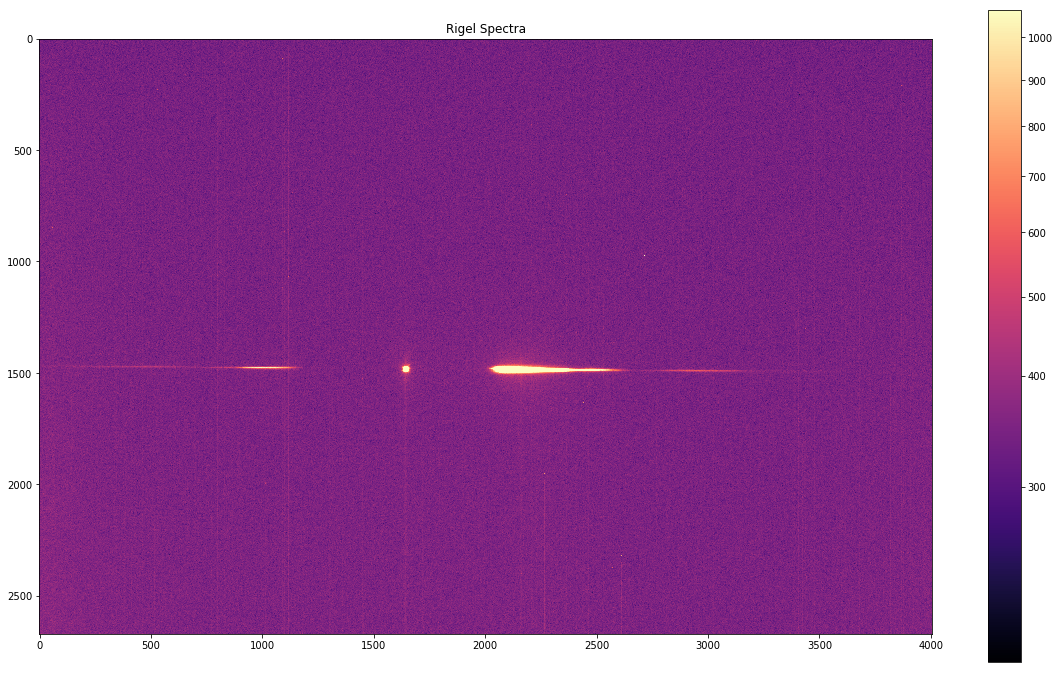

In [36]:
import matplotlib as mpl

zMin = np.nanmin(RigelSpectra)
zMax = np.nanmax(RigelSpectra)
zStd = np.nanstd(RigelSpectra)

print(zMin, zMax, zStd*3)

# Define a normaliser object
norm = mpl.colors.PowerNorm(0.5, vmin=zMin, vmax=zStd*3)


plt.imshow(RigelSpectra, cmap='magma', aspect='equal', interpolation='none', norm=norm)
plt.colorbar()
#plt.clim(3354,2529) #adjust this to set the upper and lower range of the colorbar
plt.gcf().set_size_inches(20,12)
plt.title('Rigel Spectra')

In [ ]:
norm = mpl.colors.PowerNorm

In [ ]:
norm = mpl.colors.Normalize

In [14]:
np.mean(RigelSpectra)

354.70869903165527

Text(0.5,1,u'Rigel Spectra')

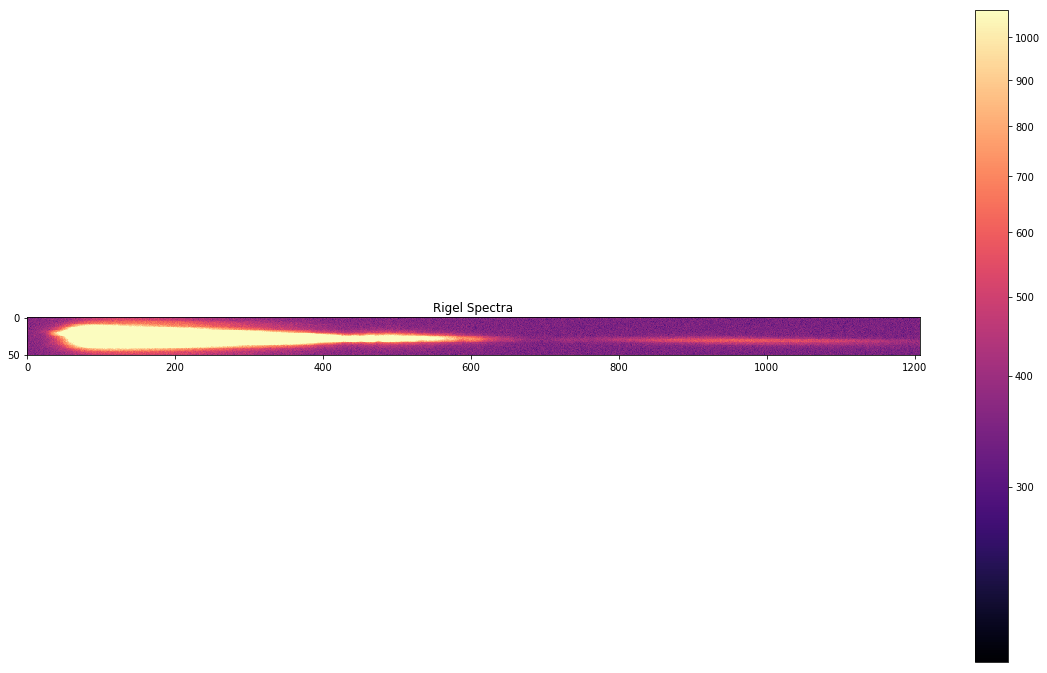

In [60]:
maxY=1510
minY=1459
minX=1988
maxX=3195
Cut = RigelSpectra[minY:maxY, minX:maxX]

plt.imshow(Cut, cmap='magma', aspect='equal', interpolation='none',norm=norm)
plt.colorbar()
# plt.clim(3354,2529) #adjust this to set the upper and lower range of the colorbar
plt.gcf().set_size_inches(20,12)
plt.title('Rigel Spectra')

Text(0.5,0.98,u'Science Spectra')

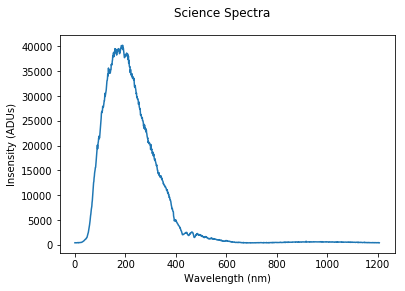

In [113]:
cutAvg=np.nanmax(Cut, axis=0)
plt.plot(cutAvg)
plt.xlabel ('Wavelength (nm)')
plt.ylabel ('Insensity (ADUs)')
plt.suptitle ('Science Spectra')

Text(0.5,1,u'Rigel Spectra')

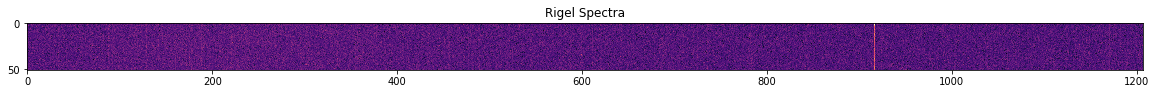

In [85]:
maxY=1810
minY=1759
minX=1988
maxX=3195

SkyCutTop = RigelSpectra[minY:maxY, minX:maxX]

plt.imshow(SkyCutTop, cmap='magma', aspect='equal', interpolation='none')
#plt.colorbar()
# plt.clim(3354,2529) #adjust this to set the upper and lower range of the colorbar
plt.gcf().set_size_inches(20,12)
plt.title('Rigel Spectra')






Text(0.5,1,u'Rigel Spectra')

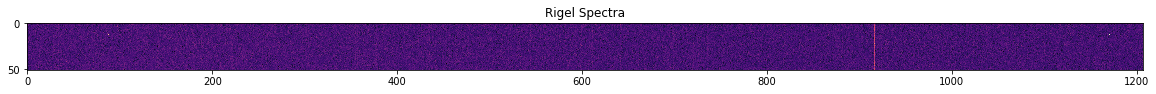

In [87]:
maxY=1210
minY=1159
minX=1988
maxX=3195

SkyCutBottom = RigelSpectra[minY:maxY, minX:maxX]

plt.imshow(SkyCutBottom, cmap='magma', aspect='equal', interpolation='none')
#plt.colorbar()
# plt.clim(3354,2529) #adjust this to set the upper and lower range of the colorbar
plt.gcf().set_size_inches(20,12)
plt.title('Rigel Spectra')


Text(0.5,0.98,u'Combined Sky Spectra')

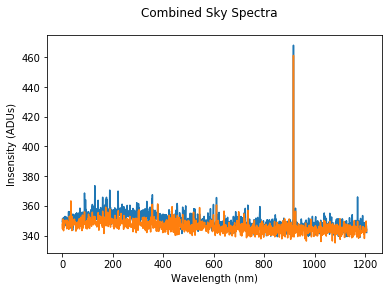

In [112]:
TopAvg=np.nanmean(SkyCutTop, axis=0)
BottAvg=np.nanmean(SkyCutBottom, axis=0)
plt.plot(TopAvg)
plt.plot(BottAvg)
plt.xlabel ('Wavelength (nm)')
plt.ylabel ('Insensity (ADUs)')
plt.suptitle ('Combined Sky Spectra')

Text(0.5,0.98,u'Average Sky Spectra')

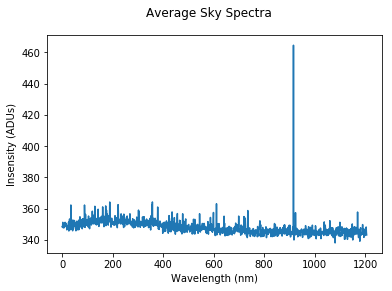

In [111]:
TotAvg=(TopAvg+BottAvg)/2.
plt.plot(TotAvg)
plt.xlabel ('Wavelength (nm)')
plt.ylabel ('Insensity (ADUs)')
plt.suptitle ('Average Sky Spectra')

Text(0.5,0.98,u'Combined Sky/Science Spectra')

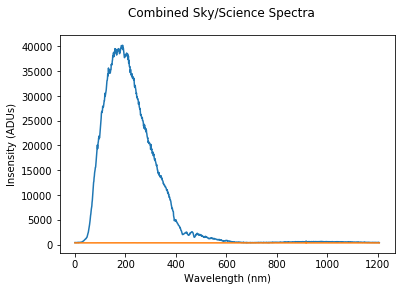

In [110]:
plt.plot(cutAvg)
plt.plot(TotAvg)
plt.xlabel ('Wavelength (nm)')
plt.ylabel ('Insensity (ADUs)')
plt.suptitle ('Combined Sky/Science Spectra')

Text(0.5,0.98,u'Final Spectra')

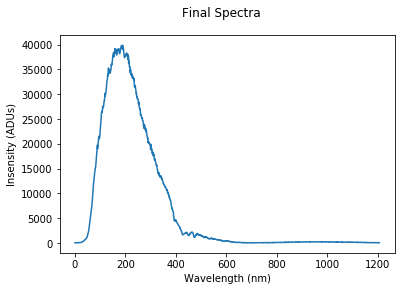

In [109]:
finalSpec = cutAvg - TotAvg
plt.plot(finalSpec)
plt.xlabel ('Wavelength (nm)')
plt.ylabel ('Insensity (ADUs)')
plt.suptitle ('Final Spectra')

We got the average from the two sky cuts and subtracted them from the spectrum to get the final spectrum without the skys spectrum added to it. 


The shape of our science spectra was the same as what we found online. That being said, our peaks are not as well defined as other spectra we found. This could be due to our image being slightly over-saturated.

The large peak in the sky spectra doesn't correspond with anything in other sky spectra. This could be the result of an error in the camera or light pollution present at the time of the image capture.